In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv' , encoding='latin')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## DATA CLEANING 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.rename(columns={'v1':'target' , 'v2':'text'},inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])

In [9]:
df.sample(5)

,target,text
2360,0,Had the money issue weigh me down but thanks t...
4260,0,Pls dont forget to study
3301,0,Stop calling everyone saying I might have canc...
3512,0,Staff of placement training in Amrita college.
1694,0,ÌÏ eatin later but i'm eatin wif my frens now ...


In [10]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
df.duplicated().sum()

403

In [12]:
df.drop_duplicates(keep='first',inplace=True)

## EXPLORATORY DATA ANALYSIS

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

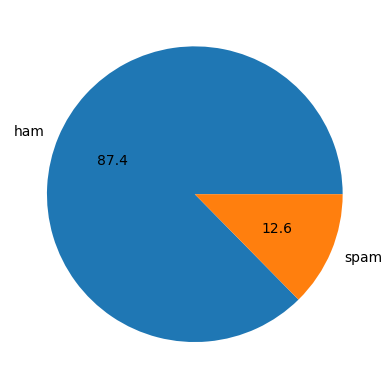

In [15]:
plt.pie(df['target'].value_counts() , labels=['ham','spam'] , autopct = '%0.1f')
plt.show()

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91897\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
df['num_characters'] = df['text'].apply(len)

df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [18]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [19]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [20]:
#HAM
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [21]:
#SPAM
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


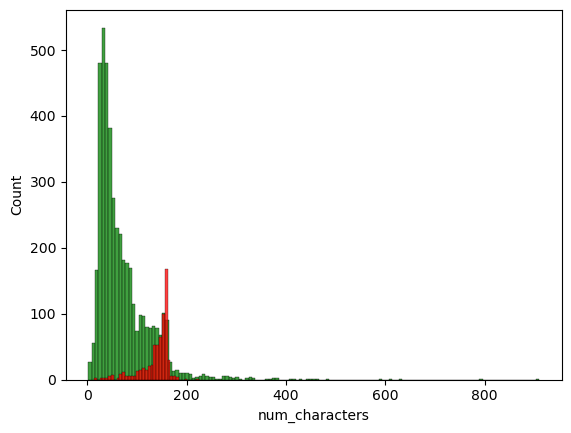

In [22]:
sns.histplot(df[df['target']==0]['num_characters'] , color='green')
sns.histplot(df[df['target']==1]['num_characters'] , color='red')
plt.show()

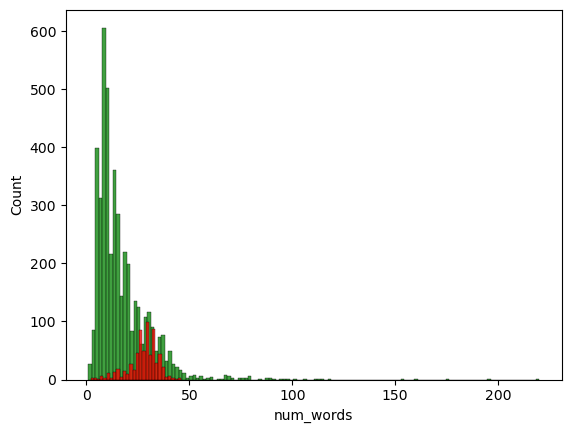

In [23]:
sns.histplot(df[df['target']==0]['num_words'] , color='green')
sns.histplot(df[df['target']==1]['num_words'] , color='red')
plt.show()

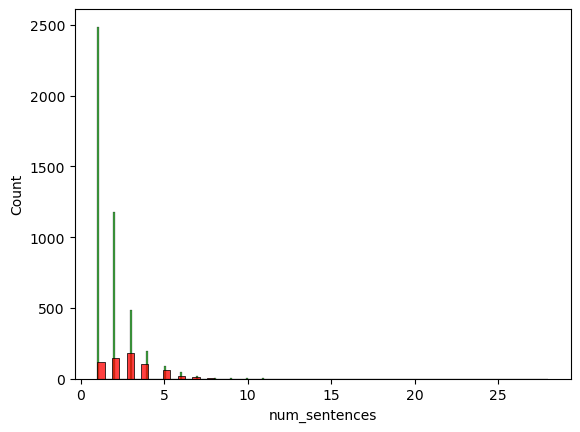

In [24]:
sns.histplot(df[df['target']==0]['num_sentences'] , color='green')
sns.histplot(df[df['target']==1]['num_sentences'] , color='red')
plt.show()

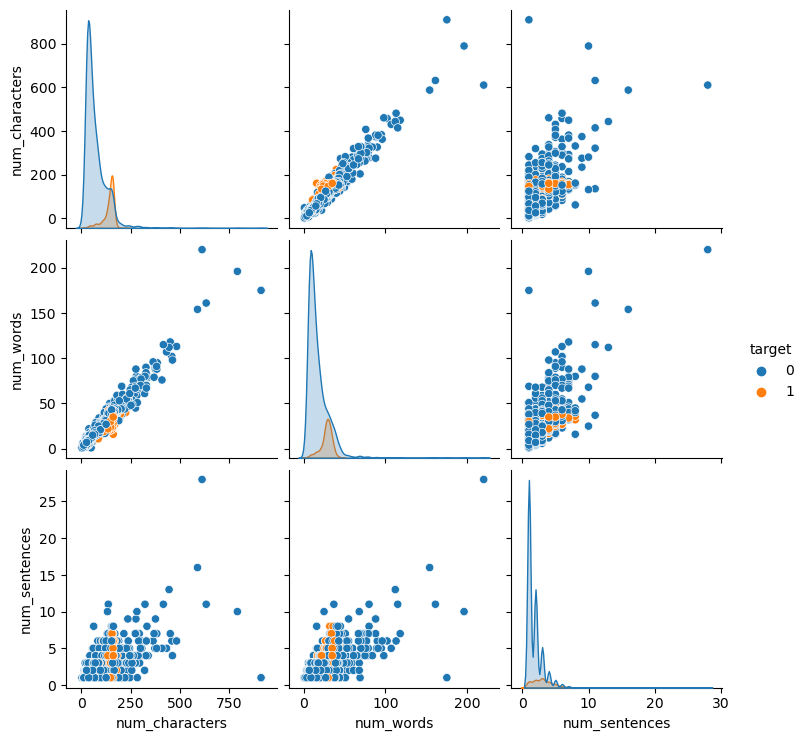

In [25]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

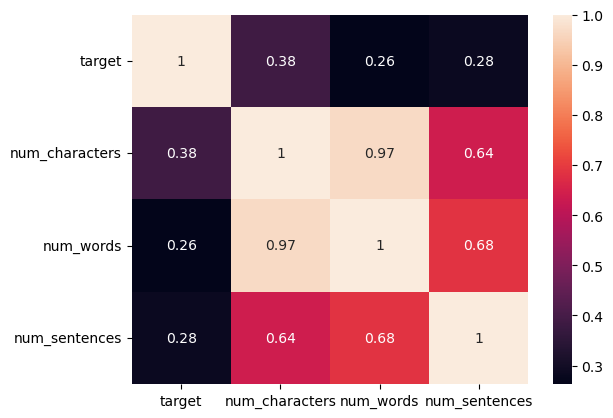

In [26]:
corr = df.corr()
sns.heatmap(corr , annot=True)

## TEXT PREPROCESSING

In [27]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [30]:
def transform_text(text):
    # Lowering 
    text = text.lower()
    
    #Tokenizing
    text = nltk.word_tokenize(text)
    
    #Removing special characters
    new_text=[]
    for word in text:
        if word.isalnum():
            new_text.append(word)
    
    text = new_text[:]
    new_text.clear()
    
    #Removing stopwords and punctuation
    for word in text:
        if word not in stopwords.words('english') and word not in string.punctuation:
            new_text.append(word)
            
            
    text = new_text[:]
    new_text.clear()
    
    # Stemming
    for word in text :
        new_text.append(ps.stem(word))
        
    return " ".join(new_text)

In [31]:
df['transformed_text'] = df['text'].apply(transform_text)

In [32]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## WORDCLOUDS`

In [33]:
from wordcloud import WordCloud

wc = WordCloud(width = 500 , height=500 , min_font_size=15 , background_color='white')

In [34]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

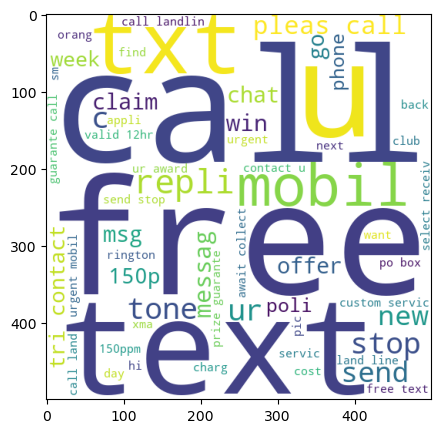

In [35]:
plt.figure(figsize=(15,5))
plt.imshow(spam_wc)

In [36]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

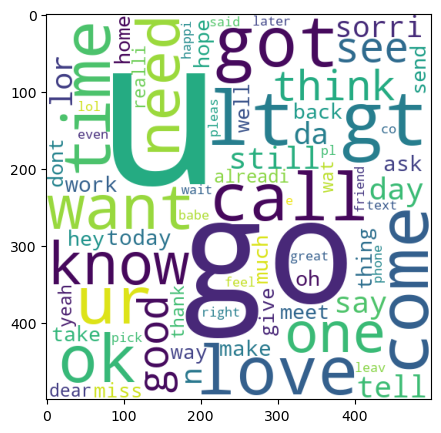

In [37]:
plt.figure(figsize=(15,5))
plt.imshow(ham_wc)

In [38]:
# MOST FREQUENT WORDS IN SPAM AND HAM
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


        

        

In [39]:
len(spam_corpus)

9939

In [40]:
len(ham_corpus)

35394

In [41]:
from collections import Counter
spams = pd.DataFrame(Counter(spam_corpus).most_common(10))
spams

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [42]:
hams = pd.DataFrame(Counter(ham_corpus).most_common(10))
hams

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


C:\Users\91897\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


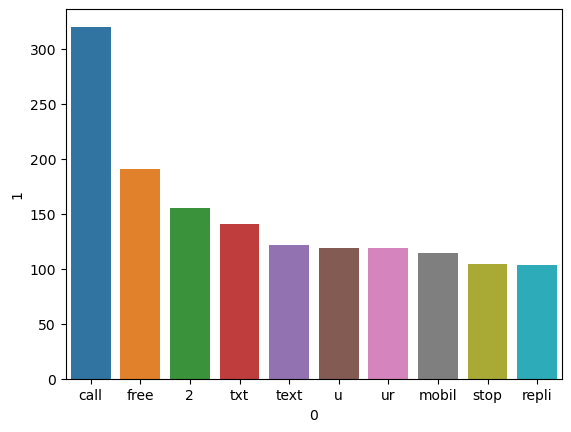

In [43]:
sns.barplot(spams[0] , spams[1])
plt.show()

C:\Users\91897\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


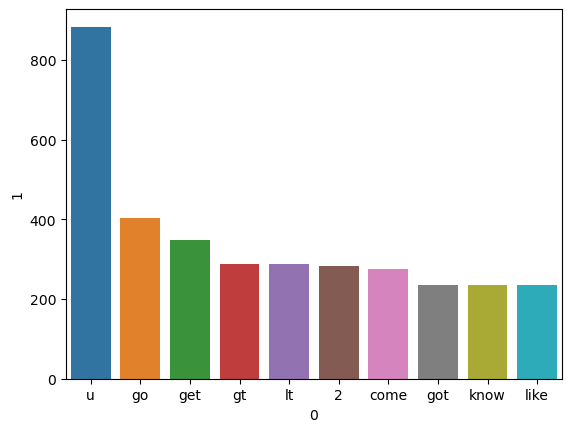

In [44]:
sns.barplot(hams[0] , hams[1])
plt.show()

## MODELLING 

In [57]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

cv = CountVectorizer()
tf = TfidfVectorizer(max_features = 3000)


In [58]:
X = cv.fit_transform(df['transformed_text']).toarray()

X1 = tf.fit_transform(df['transformed_text']).toarray()

Y =df['target'].values

In [59]:
X.shape , X1.shape

((5169, 6708), (5169, 3000))

In [60]:
from sklearn.model_selection import train_test_split as tts

x_train , x_test , y_train , y_test = tts(X1 ,Y ,test_size=0.2 , random_state=42)

In [61]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score , precision_score , f1_score

gb = GaussianNB()
mb = MultinomialNB()
bb = BernoulliNB()

lr=LogisticRegression()
tree=DecisionTreeClassifier()
forest=RandomForestClassifier()
xg=XGBClassifier()
cat=CatBoostClassifier()
svm=SVC()
knn=KNeighborsClassifier()
ada=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

In [62]:
def model_maker(model):
    clf=model
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print(accuracy_score(y_test,y_pred))
    print(precision_score(y_test,y_pred))
    print(f1_score(y_test,y_pred))

In [66]:
# MULTINOMIAL NAIVE BAYES PERFORMS THE BEST  !!!!! 

In [67]:
model_maker(mb)

0.9729206963249516
0.9915966386554622
0.893939393939394


In [68]:
import pickle

pickle.dump(tf , open('vectorizer.pkl','wb'))
pickle.dump(mb , open('model.pkl' ,'wb'))